In [1]:
import re
import numpy as np
import pandas as pd
import jieba
import openpyxl
import nltk
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
jieba.dt.cache_file = 'jieba.cache.lmspeech'

Building prefix dict from c:\venv\workspace\source\Text mining\beefnpork.txt ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache.lmspeech
Loading model cost 0.018 seconds.
Prefix dict has been built successfully.


美國 539
進口 399
牛肉 352
瘦肉精 260
談判 179
國人 171
臺灣 146
政府 144
衛生署 142
開放 138


  Terms  Freq.
0    美國    539
1    進口    399
2    牛肉    352
3   瘦肉精    260
4    談判    179
5    國人    171
6    臺灣    146
7    政府    144
8   衛生署    142
9    開放    138
Text(0, 0.5, 'Frequency')


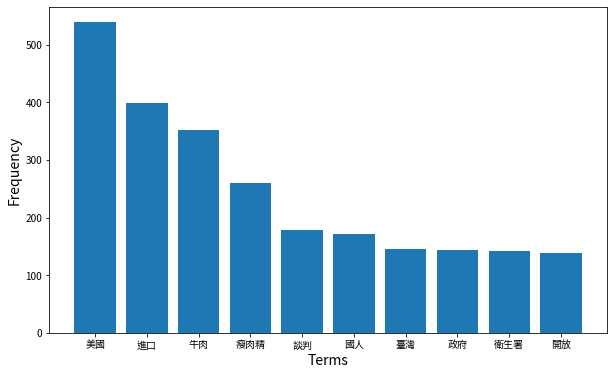

In [2]:
data01 = pd.read_excel("C:/Users/User/Documents/Operation Holy Grail/Phase 4//Data/Pork n beef import/MPSA/Ma_KMTerspeech.xlsx")
data01.fillna("",inplace=True)
lmspeech_KMT = list(data01['text'])
data01.head()

jieba.set_dictionary('beefnpork.txt')
jieba.load_userdict('beefnpork.txt')
with open('stopwords.txt', encoding = 'UTF-8') as f:
    stop_words = f.readlines()
stop_words = [w.replace('\n', '') for w in stop_words]
stop_words = [w.replace(' ', '') for w in stop_words]
rule = re.compile(r"[^\u4e00-\u9fa5]")
lmspeech_KMT = [list(jieba.cut(rule.sub('', speech))) for speech in lmspeech_KMT]
for idx, speech in enumerate(lmspeech_KMT):
    lmspeech_KMT[idx] = ' '.join([word for word in speech if word.strip() not in stop_words])
    
swo=pd.DataFrame(columns=['發言內容'], data = lmspeech_KMT)
swo.to_excel("test_bnfma.xlsx",encoding='UTF-8')

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(lmspeech_KMT)
    bag_of_words = vec.transform(lmspeech_KMT)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words_maKMT = get_top_n_words(lmspeech_KMT, 10)
for word, freq in common_words_maKMT:
    print(word, freq)
    
import plotly.express as px
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

ma_KMT_plotly = pd.DataFrame(common_words_maKMT, columns = ['ReviewText' , 'count'])
ma_KMT_plotly.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', xTitle='Terms', yTitle='Count', linecolor='black', title='The 10 most frequent terms of KMT legislators in Ma era')

maKMT_cwdf = pd.DataFrame(common_words_maKMT, columns=['Terms', 'Freq.'])  
print(maKMT_cwdf)

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK TC']
plt.rcParams['axes.unicode_minus'] = False

KMT_ma_fig = plt.figure(figsize=(10,6))
KMT_ma_fig = plt.bar(maKMT_cwdf['Terms'], maKMT_cwdf['Freq.']) 
KMT_ma_fig = plt.xlabel('Terms', fontsize = 14)
KMT_ma_fig = plt.ylabel("Frequency", fontsize = 14)
#KMT_ma_fig = plt.title("The 10 most frequent terms of KMT legislators in Ma era", fontsize = 18)

print(KMT_ma_fig)

Building prefix dict from c:\venv\workspace\source\Text mining\beefnpork.txt ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache.lmspeech
Loading model cost 0.011 seconds.
Prefix dict has been built successfully.


美國 819
牛肉 476
瘦肉精 455
進口 401
行政院 234
臺灣 219
健康 194
衛生署 194
報告 192
國人 191


  Terms  Freq.
0    美國    819
1    牛肉    476
2   瘦肉精    455
3    進口    401
4   行政院    234
5    臺灣    219
6    健康    194
7   衛生署    194
8    報告    192
9    國人    191
Text(0, 0.5, 'Frequency')


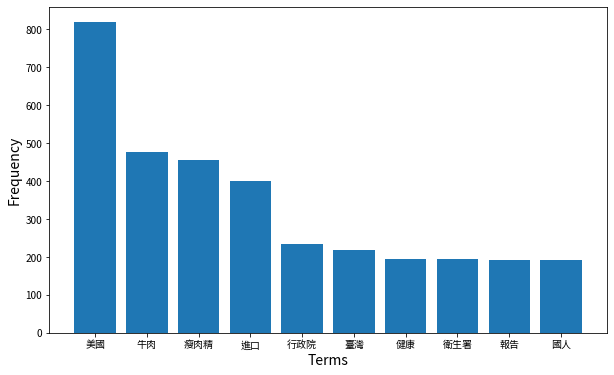

In [3]:
data02 = pd.read_excel("C:/Users/User/Documents/Operation Holy Grail/Phase 4//Data/Pork n beef import/MPSA/Ma_DPPerspeech.xlsx")
data02.fillna("",inplace=True)
lmspeech_DPP = list(data02['text'])
data02.head()

jieba.set_dictionary('beefnpork.txt')
jieba.load_userdict('beefnpork.txt')
with open('stopwords.txt', encoding = 'UTF-8') as f:
    stop_words = f.readlines()
stop_words = [w.replace('\n', '') for w in stop_words]
stop_words = [w.replace(' ', '') for w in stop_words]
rule = re.compile(r"[^\u4e00-\u9fa5]")
lmspeech_DPP = [list(jieba.cut(rule.sub('', speech))) for speech in lmspeech_DPP]
for idx, speech in enumerate(lmspeech_DPP):
    lmspeech_DPP[idx] = ' '.join([word for word in speech if word.strip() not in stop_words])
    
swo=pd.DataFrame(columns=['發言內容'], data = lmspeech_DPP)
swo.to_excel("test_bnfma.xlsx",encoding='UTF-8')

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(lmspeech_DPP)
    bag_of_words = vec.transform(lmspeech_DPP)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words_maDPP = get_top_n_words(lmspeech_DPP, 10)
for word, freq in common_words_maDPP:
    print(word, freq)
    
import plotly.express as px
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

ma_DPP_plotly = pd.DataFrame(common_words_maDPP, columns = ['ReviewText' , 'count'])
ma_DPP_plotly.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', xTitle='Terms', yTitle='Count', linecolor='black', title='The 10 most frequent terms of DPP legislators in Ma era')

maDPP_cwdf = pd.DataFrame(common_words_maDPP, columns=['Terms', 'Freq.'])  
print(maDPP_cwdf)

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK TC']
plt.rcParams['axes.unicode_minus'] = False

DPP_ma_fig = plt.figure(figsize=(10,6))
DPP_ma_fig = plt.bar(maDPP_cwdf['Terms'], maDPP_cwdf['Freq.'])
DPP_ma_fig = plt.xlabel('Terms', fontsize = 14)
DPP_ma_fig = plt.ylabel("Frequency", fontsize = 14)
#plt.title("The 10 most frequent terms of DPP legislators in Ma era", fontsize = 18)

print(DPP_ma_fig)

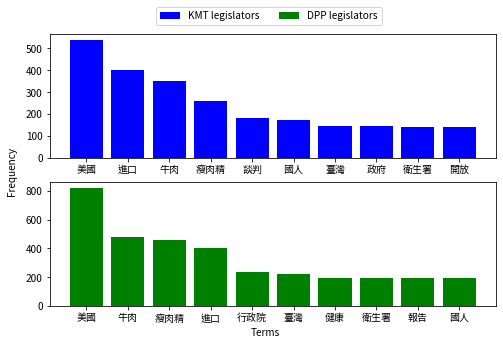

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(8,5))
plt.subplot(2, 1, 1)
KMT_ma_fig = plt.bar(maKMT_cwdf['Terms'], maKMT_cwdf['Freq.'], color = 'blue')
plt.subplot(2, 1, 2)
DPP_ma_fig = plt.bar(maDPP_cwdf['Terms'], maDPP_cwdf['Freq.'], color = 'green')
#ax.set_xlabel("Terms")
#ax.set_ylabel("Frequency")
fig.text(0.5, 0.05, 'Terms', ha='center', va='center')
fig.text(0.06, 0.5, 'Frequency', ha='center', va='center', rotation='vertical')
fig.legend(handles=[KMT_ma_fig, DPP_ma_fig], labels=['KMT legislators', 'DPP legislators'], bbox_to_anchor=[0.71, 0.97], ncol=2)
           #loc= 'upper center', ncol=2)
plt.savefig('KMTDPPwordfreq_ma.png', dpi=300)

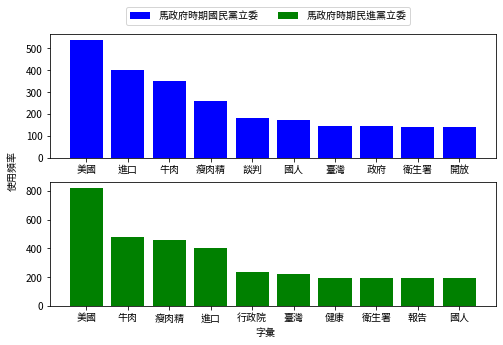

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(8,5))
plt.subplot(2, 1, 1)
KMT_ma_fig = plt.bar(maKMT_cwdf['Terms'], maKMT_cwdf['Freq.'], color = 'blue')
plt.subplot(2, 1, 2)
DPP_ma_fig = plt.bar(maDPP_cwdf['Terms'], maDPP_cwdf['Freq.'], color = 'green')
#ax.set_xlabel("Terms")
#ax.set_ylabel("Frequency")
fig.text(0.5, 0.05, '字彙', ha='center', va='center')
fig.text(0.06, 0.5, '使用頻率', ha='center', va='center', rotation='vertical')
fig.legend(handles=[KMT_ma_fig, DPP_ma_fig], labels=['馬政府時期國民黨立委', '馬政府時期民進黨立委'], bbox_to_anchor=[0.76, 0.97], ncol=2)
           #loc= 'upper center', ncol=2)
plt.savefig('KMTDPPwordfreq_ma_zhtw.png', dpi=300)

Building prefix dict from c:\venv\workspace\source\Text mining\beefnpork.txt ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache.lmspeech
Loading model cost 0.000 seconds.
Prefix dict has been built successfully.


進口 770
美國 668
臺灣 604
豬肉 502
開放 463
瘦肉精 457
萊豬 440
萊克多巴胺 426
美豬 417
健康 342


   Terms  Freq.
0     進口    770
1     美國    668
2     臺灣    604
3     豬肉    502
4     開放    463
5    瘦肉精    457
6     萊豬    440
7  萊克多巴胺    426
8     美豬    417
9     健康    342
Text(0, 0.5, 'Frequency')


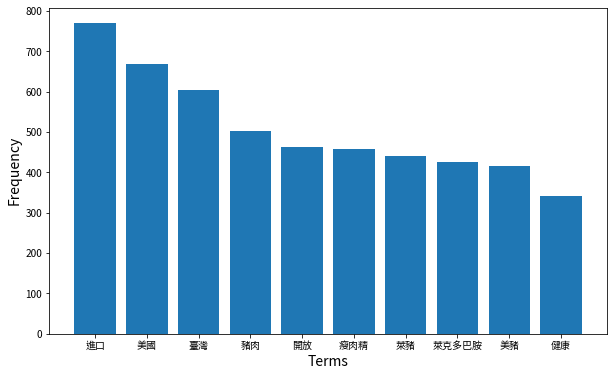

In [6]:
#KMT and DPP legislators' speech in Tsai era to be added
data03 = pd.read_excel("C:/Users/User/Documents/Operation Holy Grail/Phase 4//Data/Pork n beef import/MPSA/Tsai_KMTerspeech.xlsx")
data03.fillna("",inplace=True)
lmspeech_KMT = list(data03['text'])
data03.head()

jieba.set_dictionary('beefnpork.txt')
jieba.load_userdict('beefnpork.txt')
with open('stopwords.txt', encoding = 'UTF-8') as f:
    stop_words = f.readlines()
stop_words = [w.replace('\n', '') for w in stop_words]
stop_words = [w.replace(' ', '') for w in stop_words]
rule = re.compile(r"[^\u4e00-\u9fa5]")
lmspeech_KMT = [list(jieba.cut(rule.sub('', speech))) for speech in lmspeech_KMT]
for idx, speech in enumerate(lmspeech_KMT):
    lmspeech_KMT[idx] = ' '.join([word for word in speech if word.strip() not in stop_words])
    
swo=pd.DataFrame(columns=['發言內容'], data = lmspeech_KMT)
swo.to_excel("test_bnfma.xlsx",encoding='UTF-8')

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(lmspeech_KMT)
    bag_of_words = vec.transform(lmspeech_KMT)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words_tsaiKMT = get_top_n_words(lmspeech_KMT, 10)
for word, freq in common_words_tsaiKMT:
    print(word, freq)
    
import plotly.express as px
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

tsai_KMT_plotly = pd.DataFrame(common_words_tsaiKMT, columns = ['ReviewText' , 'count'])
tsai_KMT_plotly.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', xTitle='Terms', yTitle='Count', linecolor='black', title='The 10 most frequent terms of KMT legislators in Tsai era')

tsaiKMT_cwdf = pd.DataFrame(common_words_tsaiKMT, columns=['Terms', 'Freq.'])  
print(tsaiKMT_cwdf)

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK TC']
plt.rcParams['axes.unicode_minus'] = False

KMT_tsai_fig = plt.figure(figsize=(10,6))
KMT_tsai_fig = plt.bar(tsaiKMT_cwdf['Terms'], tsaiKMT_cwdf['Freq.']) 
KMT_tsai_fig = plt.xlabel('Terms', fontsize = 14)
KMT_tsai_fig = plt.ylabel("Frequency", fontsize = 14)
#KMT_ma_fig = plt.title("The 10 most frequent terms of KMT legislators in Tsai era", fontsize = 18)

print(KMT_tsai_fig)

Building prefix dict from c:\venv\workspace\source\Text mining\beefnpork.txt ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache.lmspeech
Loading model cost 0.000 seconds.
Prefix dict has been built successfully.


臺灣 322
進口 284
豬肉 228
美國 220
美豬 219
標示 176
萊克多巴胺 165
學校 160
食品 147
農委會 128


   Terms  Freq.
0     臺灣    322
1     進口    284
2     豬肉    228
3     美國    220
4     美豬    219
5     標示    176
6  萊克多巴胺    165
7     學校    160
8     食品    147
9    農委會    128
<BarContainer object of 10 artists>


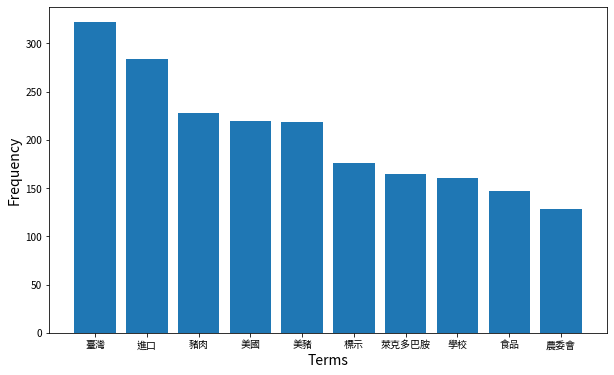

In [7]:
data04 = pd.read_excel("C:/Users/User/Documents/Operation Holy Grail/Phase 4//Data/Pork n beef import/MPSA/Tsai_DPPerspeech.xlsx")
data04.fillna("",inplace=True)
lmspeech_DPP = list(data04['text'])
data04.head()

jieba.set_dictionary('beefnpork.txt')
jieba.load_userdict('beefnpork.txt')
with open('stopwords.txt', encoding = 'UTF-8') as f:
    stop_words = f.readlines()
stop_words = [w.replace('\n', '') for w in stop_words]
stop_words = [w.replace(' ', '') for w in stop_words]
rule = re.compile(r"[^\u4e00-\u9fa5]")
lmspeech_DPP = [list(jieba.cut(rule.sub('', speech))) for speech in lmspeech_DPP]
for idx, speech in enumerate(lmspeech_DPP):
    lmspeech_DPP[idx] = ' '.join([word for word in speech if word.strip() not in stop_words])
    
swo=pd.DataFrame(columns=['發言內容'], data = lmspeech_DPP)
swo.to_excel("test_bnfma.xlsx",encoding='UTF-8')

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(lmspeech_DPP)
    bag_of_words = vec.transform(lmspeech_DPP)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words_tsaiDPP = get_top_n_words(lmspeech_DPP, 10)
for word, freq in common_words_tsaiDPP:
    print(word, freq)
    
import plotly.express as px
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

tsai_DPP_plotly = pd.DataFrame(common_words_tsaiDPP, columns = ['ReviewText' , 'count'])
tsai_DPP_plotly.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', xTitle='Terms', yTitle='Count', linecolor='black', title='The 10 most frequent terms of DPP legislators in Tsai era')

tsaiDPP_cwdf = pd.DataFrame(common_words_tsaiDPP, columns=['Terms', 'Freq.'])  
print(tsaiDPP_cwdf)

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK TC']
plt.rcParams['axes.unicode_minus'] = False

DPP_tsai_fig = plt.figure(figsize=(10,6))
DPP_tsai_fig = plt.bar(tsaiDPP_cwdf['Terms'], tsaiDPP_cwdf['Freq.'])
DPP_tsai_fig = plt.xlabel('Terms', fontsize = 14)
DPP_tsai_fig = plt.ylabel("Frequency", fontsize = 14)
#plt.title("The 10 most frequent terms of DPP legislators in Tsai era", fontsize = 18)

print(DPP_ma_fig)

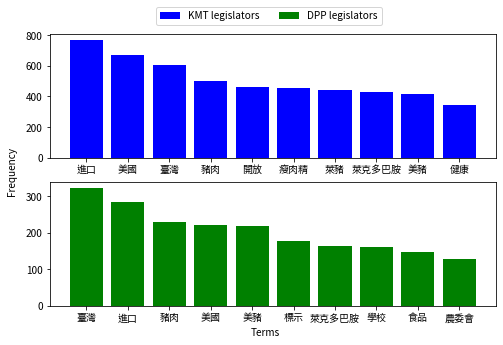

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(8,5))
plt.subplot(2, 1, 1)
KMT_tsai_fig = plt.bar(tsaiKMT_cwdf['Terms'], tsaiKMT_cwdf['Freq.'], color = 'blue')
plt.subplot(2, 1, 2)
DPP_tsai_fig = plt.bar(tsaiDPP_cwdf['Terms'], tsaiDPP_cwdf['Freq.'], color = 'green')
#ax.set_xlabel("Terms")
#ax.set_ylabel("Frequency")
fig.text(0.5, 0.05, 'Terms', ha='center', va='center')
fig.text(0.06, 0.5, 'Frequency', ha='center', va='center', rotation='vertical')
fig.legend(handles=[KMT_tsai_fig, DPP_tsai_fig], labels=['KMT legislators', 'DPP legislators'], 
           bbox_to_anchor=[0.71, 0.97], ncol=2)
plt.savefig('KMTDPPwordfreq_tsai.png', dpi=300)

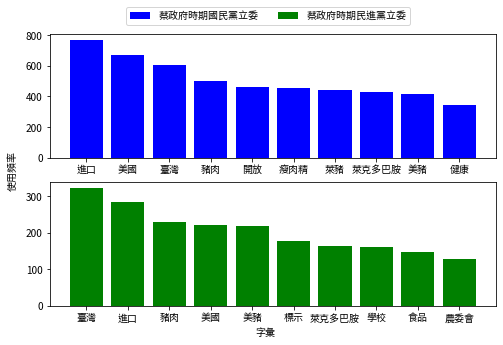

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(8,5))
plt.subplot(2, 1, 1)
KMT_tsai_fig = plt.bar(tsaiKMT_cwdf['Terms'], tsaiKMT_cwdf['Freq.'], color = 'blue')
plt.subplot(2, 1, 2)
DPP_tsai_fig = plt.bar(tsaiDPP_cwdf['Terms'], tsaiDPP_cwdf['Freq.'], color = 'green')
#ax.set_xlabel("Terms")
#ax.set_ylabel("Frequency")
fig.text(0.5, 0.05, '字彙', ha='center', va='center')
fig.text(0.06, 0.5, '使用頻率', ha='center', va='center', rotation='vertical')
fig.legend(handles=[KMT_ma_fig, DPP_ma_fig], labels=['蔡政府時期國民黨立委', '蔡政府時期民進黨立委'], 
           bbox_to_anchor=[0.76, 0.97], ncol=2)
plt.savefig('KMTDPPwordfreq_tsai_zhtw.png', dpi=300)

In [10]:
#from matplotlib import font_manager
#font_set = {f.name for f in font_manager.fontManager.ttflist}
#for f in font_set:
    #print(f)